In [1]:
include("../../../julia/FNC_init.jl")

  Activating 

project at `~/Documents/GitHub/fnc`


[**Demo %s**](#demo-systems-coupledpendula)

Let's implement the coupled pendulums from {numref}`Example {number} <example-systems-coupledpendula>`. The pendulums will be pulled in opposite directions and then released together from rest.
```{tip}
:class: dropdown
The `similar` function creates an array of the same size and type as a given value, without initializing the contents.
```

In [2]:
function couple(u, p, t)
    γ, L, k = p
    g = 9.8
    udot = similar(u)
    udot[1:2] .= u[3:4]
    udot[3] = -γ * u[3] - (g / L) * sin(u[1]) + k * (u[2] - u[1])
    udot[4] = -γ * u[4] - (g / L) * sin(u[2]) + k * (u[1] - u[2])
    return udot
end

u₀ = [1.25, -0.5, 0, 0]
tspan = (0.0, 50.0);

First we check the behavior of the system when the pendulums are uncoupled, i.e., when $k=0$.
```{tip}
:class: dropdown
Here `idxs` is used to plot two components as functions of time.
```

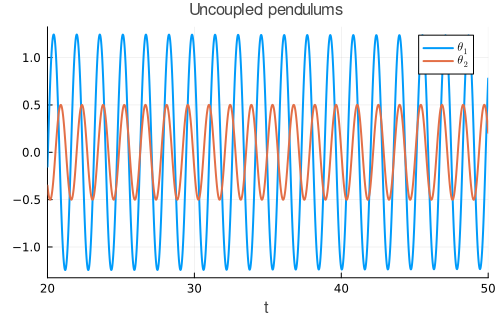

In [3]:
using OrdinaryDiffEq
γ, L, k = 0, 0.5, 0
ivp = ODEProblem(couple, u₀, tspan, [γ, L, k])
sol = solve(ivp, Tsit5())
plot(sol, idxs=[1, 2], 
    label=[L"\theta_1" L"\theta_2"],
    xlims=[20, 50], 
    title="Uncoupled pendulums")

You can see that the pendulums swing independently. Because the model is nonlinear and the initial angles are not small, they have slightly different periods of oscillation, and they go in and out of phase.

With coupling activated, a different behavior is seen.

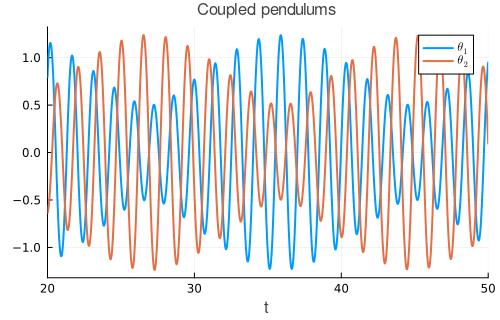

In [4]:
k = 1
ivp = ODEProblem(couple, u₀, tspan, [γ, L, k])
sol = solve(ivp, Tsit5())
plot(sol, idxs=[1, 2], 
    label=[L"\theta_1" L"\theta_2"],
    xlims=[20, 50], 
    title="Coupled pendulums")

The coupling makes the pendulums swap energy back and forth.